### The Titanic

![The Titanic](titanic.jpeg)

#### Context

So what do we know already?:

- Most of you will probably have seen the movie by James Cameron (starring Kate Winslet and Leonardo DiCaprio, 1997) which is one of several movies made with the disaster as subject;
- The disaster took place during the night of April 14th, 1912 when the ship hit an iceberg on her mayden voyage out of Southampton (UK) to New York (USA) via Cherbourg (FR) and Queenstown (IRE);
- The loss of lives was 1501 out of a total of 2207 passengers and crew;
- There was a shortage of lifeboats and some of the lifeboats were set afloat whilst not fully occupied.

#### The data

Now we are going to cheat bigtime here, because we will use the dataset(s) prepared for the Kaggle competition. In the wild, out there, you will have to collect the data yourself, often from various sources, messy and incomplete and you will have to spend considerable time searching for data and cleaning the data you found. Estimations vary, but one will probably spend between 60-80% of one's time on searching and cleaning.

Re-use of data, as we are doing here, can be a big timesaver. Hence the importance of "tidy data".

#### Get to know the data

I usually load the data, if it is data in csv format, in my editor and poke aroud a little bit:

In [1]:
!/usr/local/bin/aquamacs /Users/peter/Documents/bootcamps/faector_bc/data/titanic3.csv

All sorts of useful insights can be get this way:

- the name column also contains some extras, like titles: Mr., Mrs., Miss., Master, Rev., Don., etc. as well as the maiden names of female passengers. Passenger 152, for example, is Mrs. Thomas Pearce == Edith Wearne;
- whenever we see two adjacent comma's ',,' we know we are dealing with missing data;
- we might wonder what the column headers "sibsp" and "parch" mean: the number of SIBlings / SPouses abord, the number of PARents / CHildren aboard.
- Suppose, we want to predict who had the best chances of survival: men or women, younger persons or older persons, people travelling first class? What could be a sound strategy? Doe we have some ideas?

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [4]:
url = "https://raw.githubusercontent.com/eur-nl/bootcamps/master/pandas_faector_bc/data/titanic3.csv"
df_titanic = pd.read_csv(url, sep=";")

EmptyDataError: No columns to parse from file

Now that we have our csv file as a Pandas dataframe, we can use methods on the Pandas "dataframe object" that the library provides:

- [dataframe].shape: Presents the dimensions of the dataframe as a tuple
- [dataframe].head(): Shows the first 5 rows of the dataframe
- [dataframe].describe(): Generates some descriptive statistics
- [dataframe].info(): Generates overview of columns and datatypes and their values

In [4]:
df_titanic.shape

(1309, 14)

In [5]:
df_titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,"26,5500",E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,"77,9583",D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,"0,0000",A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,"51,4792",C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,"49,5042",NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [6]:
df_titanic.describe()

,pclass,survived,age,sibsp,parch,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,328.000000


In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null object
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(2), int64(4), object(8)
memory usage: 143.2+ KB


Often it can save time later on to have a careful look at the output of the info() method. Here, for example, we can see that the 'age' column has a dtype of type object, but we would expect a number, don't we.

Let's change that right away. It happens often that data from csv files is read into a Pandas dataframe as strings where we know we are dealing with numbers of a certain type (integers or floats). So Pandas has a method to do the cleaning up. Let's do that right away:

In [8]:
pd.to_numeric(df_titanic.age)

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
5       48.0000
6       63.0000
7       39.0000
8       53.0000
9       71.0000
10      47.0000
11      18.0000
12      24.0000
13      26.0000
14      80.0000
15          NaN
16      24.0000
17      50.0000
18      32.0000
19      36.0000
20      37.0000
21      47.0000
22      26.0000
23      42.0000
24      29.0000
25      25.0000
26      25.0000
27      19.0000
28      35.0000
29      28.0000
         ...   
1279    14.0000
1280    22.0000
1281    22.0000
1282        NaN
1283        NaN
1284        NaN
1285    32.5000
1286    38.0000
1287    51.0000
1288    18.0000
1289    21.0000
1290    47.0000
1291        NaN
1292        NaN
1293        NaN
1294    28.5000
1295    21.0000
1296    27.0000
1297        NaN
1298    36.0000
1299    27.0000
1300    15.0000
1301    45.5000
1302        NaN
1303        NaN
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309,

We still have "NaN's" or missing values, but we will deal with those later on.

What do we want to know?
It might well be you have some questions in advance and want to use the data to see if you can find answers, or it could well be you want to play a little bit with the data in order to come up with questions.

Both approaches suggest the following steps:

- Explore the data (load it, look at it)
- Clean the data (missing values, splitting columns, etc.)
- Plot (try to visualize correlations, insights, ...)
- Assumptions (try to formulate hypotheses, rinse and repeat)

Let's look at the survivors. We know that 38% of the passengers survived the disaster; 62% died. Can we find out somewhat more about the chance of survival?

For the Kaggle competition, since the competition is about machine learning, you would work with two csv files, a training set and a test set. You would learn the computer to predict the survival of the people in the test set using the data of the training set.

A safe bet to start with would be: 62% of the people in the test set died. But even without machine learning, we can do better. Back to the data.

Suppose we want to have a look at the survival rate in combination with the data about the sex, age, and class of the passengers?

In [9]:
df_titanic[['survived', 'age', 'sex', 'pclass']][0:15]

,survived,age,sex,pclass
0,1,29.0000,female,1
1,1,0.9167,male,1
2,0,2.0000,female,1
3,0,30.0000,male,1
4,0,25.0000,female,1
5,1,48.0000,male,1
6,1,63.0000,female,1
7,0,39.0000,male,1
8,1,53.0000,female,1
9,0,71.0000,male,1


Bummer, we are just looking at people that travelled first class. The file must be sorted that way. Let's look at the other end of the passenger list:

In [10]:
df_titanic[['survived', 'age', 'sex', 'pclass']][-15:]

,survived,age,sex,pclass
1294,0,28.5,male,3
1295,0,21.0,male,3
1296,0,27.0,male,3
1297,0,NaN,male,3
1298,0,36.0,male,3
1299,0,27.0,male,3
1300,1,15.0,female,3
1301,0,45.5,male,3
1302,0,NaN,male,3
1303,0,NaN,male,3


Right, we definitely have something here: Seems your chances of survival were much lower when travelling third class, but we have to be careful, we have just the data of three females in this last sample. And being male is not a good thing so it seems.

When we dive in deeper, we often have to do something with the data. When looking at the age of passengers, we see that we have missing data ("NaN's"). The info() method already showed this 1046 non-null entries for age, which boils down to the fact that we miss 1309 - 1046 = 263 entries for age. We should do something about this.

We might as well drop some columns, like ticket, cabin, boat, home.dest, and body, because we probably are not going to use them.

In [11]:
# Dropping the columns for Cabin, Ticket, Body, Boat, and Home.dest
df_titanic = df_titanic.drop(['cabin', 'ticket', 'body', 'boat', 'home.dest'], axis=1)

We can use the Pandas crosstab method to zoom in on the relation between the sex of passengers and the survival rate:

In [12]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1308 non-null object
embarked    1307 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 92.1+ KB


In [13]:
pd.crosstab(df_titanic.sex, df_titanic.survived)

survived,0,1
sex,,
female,127,339
male,682,161


In [14]:
print(df_titanic.groupby('sex').survived.mean())

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64


If we try to get a quick insight, using the same method, on the relation between survival and age, things are different:

In [15]:
pd.crosstab(df_titanic.age, df_titanic.survived)

survived,0,1
age,,
0.1667,0,1
0.3333,1,0
0.4167,0,1
0.6667,0,1
0.7500,1,2
0.8333,0,3
0.9167,0,2
1.0000,3,7
2.0000,8,4


One way to getter a better insight into the relation between survival and age would be to group the passengers by age-group. We could do this by using a small program to change the age column (gaining some information, but losing the precise ages; we could use the age column to add an age-group column in order to side-step the dilemma). But there is a better way, we can use a visualization in which we divide the entries in the age column over so-called bins. For this we use the library matplotlib.

But before we can visualize things, we need to repair the missing values in the 'age' column. You know more about this than we do, but we will use the median of the ages we have values for.

In [16]:
impute_value = df_titanic['age'].median()
impute_value

28.0

Then we replace the missing values with the median (28.0).

In [17]:
df_titanic['age'] = df_titanic['age'].fillna(impute_value)

Our dataframe should now contain 1309 values in the 'age' column. Let's check it:

In [18]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1308 non-null object
embarked    1307 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 92.1+ KB


We can basically do two things here if we are interested in the relation between 'age' and survival rate:

1) We can use a visualization and drop all the values in the 'age' column into a number of bins -- that way we can get an insight into the relation;
2) Or we can use the values in the 'age' column to add a new column 'age_group' to the dataframe assigning passengers to age groups.

/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


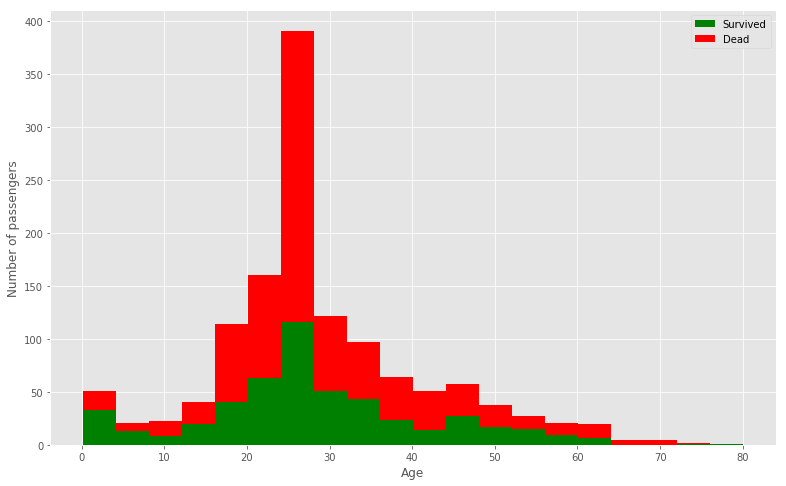

In [19]:
figure = plt.figure(figsize=(13,8))
plt.hist([df_titanic[df_titanic['survived']==1]['age'],df_titanic[df_titanic['survived']==0]['age']],
         stacked=True, color = ['g','r'],
         bins = 20,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

The crosstab and this chart seem to confirm that one old code of conduct that sailors and captains follow in case of threatening situations: "Women and children first!".

In [20]:
# Let's add the 'age_group' column to our dataframe
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_titanic['age_group'] = pd.cut(df_titanic.age, range(0, 81, 10), right=False, labels=age_labels)

In [21]:
# Let's inspect the new dataframe
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,"211,3375",S,20-29
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,"151,5500",S,0-9
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,"151,5500",S,0-9
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,"151,5500",S,30-39
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,"151,5500",S,20-29


In [22]:
# Now that we have caught the large number of age values in age groups (categories), we can try crosstab again
pd.crosstab(df_titanic.age_group, df_titanic.survived)

survived,0,1
age_group,,
0-9,32,50
10-19,87,56
20-29,407,200
30-39,134,98
40-49,83,52
50-59,38,32
60-69,22,10
70-79,6,1


In [23]:
print(df_titanic.groupby('age_group').survived.mean())

age_group
0-9      0.609756
10-19    0.391608
20-29    0.329489
30-39    0.422414
40-49    0.385185
50-59    0.457143
60-69    0.312500
70-79    0.142857
Name: survived, dtype: float64


In [24]:
# And did it matter which class you were travelling?
pd.crosstab(df_titanic.pclass, df_titanic.survived)

survived,0,1
pclass,,
1,123,200
2,158,119
3,528,181


In [25]:
# The same but now proportional
print(df_titanic.groupby('pclass').survived.mean())

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64


For the Kaggle competition the Titanic dataset is randomly split into a training set and a testing set (similar set minus the column 'Survived'). All participants worked with these two sets to predict the survival rate of the test set using patterns in the training set.

Based upon what we have found so far we could predict that all women and all children survive, and our predictions > 75% correct. There are many notebooks published with strategies tackling the now classic Kaggle Titanic competiton and, because most of them use ML methods, I have studied several of them. They easily predict > 80% correctly.

The main strategies used are defining categories out of the "raw" data that will enable the ML algorithms to better predict the survival rate of the test set. For example: Construct age groups -- just as we did with the visualization above -- and often changing the training dataset. Or by looking at people travelling together in various ways, etc. By looking at pclass in combination with fare paid and sometimes in combiantion with the titles that are available in the name field ("Women and children first, and it helped when you were travelling first class"). 

Almost all notebooks show that competitors rely heavily on visualizations in order to fathom whether they are on to something when working with patterns in the data.

In the following we will walk trough a very simple example of ML with scikit-learn.

In [26]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [27]:
train[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


Usually libraries like statsmodels and scikit-learn can not deal with missing values, so we have a look at the columns to see whether they contain missing data.

In [28]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We need Age as a predictor, so we have to fill in the missing values. There are a number ways to do it, but we just use the median of the Age column in the training set:

In [30]:
impute_value = train['Age'].median()
impute_value

28.0

In [31]:
# We use that value to fill in all the missing values, both in the training as well as in the test set.
train['Age'] = train['Age'].fillna(impute_value)
test['Age'] = train['Age'].fillna(impute_value)

In [32]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Often ML models do not work/learn well with strings as values. In the Sex column we now have "Male" and "Female". We are going to use that information to fill a new column "IsFemale" with 1 if the person has a Sex column with a value of "female".

In [33]:
train['IsFemale'] = (train['Sex'] == 'female').astype(int)
test['IsFemale'] = (test['Sex'] == 'female').astype(int)

In [34]:
train['IsFemale'].head()

0    0
1    1
2    1
3    1
4    0
Name: IsFemale, dtype: int64

In [35]:
# We choose our model variables: 'IsFemale', 'Age', and 'Pclass'
predictors = ['IsFemale', 'Age', 'Pclass']
X_train = train[predictors].values
X_test = test[predictors].values
y_train = train['Survived'].values

In [36]:
X_train[:5]

array([[  0.,  22.,   3.],
       [  1.,  38.,   1.],
       [  1.,  26.,   3.],
       [  1.,  35.,   1.],
       [  0.,  35.,   3.]])

In [37]:
y_train[:5]

array([0, 1, 1, 1, 0])

The whole idea of data science with ML is to choose an appropriate model and using well engineered features. We did not really dive in, the following is just meant to show the principles involved.

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [39]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
y_predict = model.predict(X_test)

In [41]:
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

Of course, we would need to have the real values for 'Survived' in our test set to be able to compare our prediction against what really is/was the case.

    array([0,1,0,0,1,1,0,1,0,0])

Because our 1 or 0 for survival predictions is about the fate of real people, passengers of the Titanic. Let's have a look again at one of the first encounters with the people we had:

In [42]:
df_titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,"211,3375",S,20-29
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,"151,5500",S,0-9
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,"151,5500",S,0-9
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,"151,5500",S,30-39
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,"151,5500",S,20-29
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,"26,5500",S,40-49
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,"77,9583",S,60-69
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,"0,0000",S,30-39
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,"51,4792",S,50-59
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,"49,5042",C,70-79


[Here is the story](https://www.encyclopedia-titanica.org/titanic-victim/hudson-joshua-creighton.html)

And here is a another curious one. Remember that in one of our visualizations the eldest passenger saved was 80 years of age. Who was that person and what happened?

When we look that person up in our file titanic3.csv, we find that he was a man, who travelled first class, Mr. Algernon Henry Wilson Barkworth. When we look him up on the Titanic website we find that indeed he was a survivor, born in June 1864. Which makes him 47 when the disaster took place. He was 80 when he died on 7 january 1945. So, we can get rid of an outlier in our dataset! Barkworth was 47 when he survived.

[You can read the story here](https://www.encyclopedia-titanica.org/titanic-survivor/algernon-barkworth.html)